<a href="https://colab.research.google.com/github/grace1996-beep/week-9_core/blob/main/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes - Exploratory Data analysis


# 1. Defining the question

This project seeks to predict whether a email is spamm(1) or not(0) given this dataset

 https://archive.ics.uci.edu/ml/datasets/Spambase



# Specifying the Data Analytic Question

The collection of spam e-mails came from postmaster and individuals who had filed spam. The collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter. This project therefore seeks to predict whether the email is spam or not based on the word frequency.

# Defining the metrics of success

the steps i will follow to achieve my goal will be
1. loading liblaries and dataset
2. checking for missing values and duplicated values
3. checking for anomalies
4. performing multivariate bivariate and univariate analhysis
5. using iNaive Bayes classifier for modelling.

# Data relevance

The provided data is relevant for my study.

**loading liblaries**

In [1]:
import pandas as pd
import numpy as np

# 2. Readig the data

In [19]:
c=pd.read_csv("spam.csv")
c.head()

,Word_freq_make,Word_freg_Adress,Word_freq_All,word_freq_3d,word_freq_our,Word_freq_over,word_freqRemove,word_freq_internet,word_freq_Order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_adress,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_Font,wordFreq_ooo,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_815,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_education,word_freq_table,word_freq_confrence,char_freq_::,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital run length avarage,capital run length longest,capital run lenghth total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


# 3. Checking the data

In [20]:
#checking for appropriate datatypes
c.dtypes

Word_freq_make                float64
Word_freg_Adress              float64
Word_freq_All                 float64
word_freq_3d                  float64
word_freq_our                 float64
Word_freq_over                float64
word_freqRemove               float64
word_freq_internet            float64
word_freq_Order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_adress              float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_Font                float64
wordFreq_ooo                  float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [21]:
#previewing the head of the datset
c.head(5)

,Word_freq_make,Word_freg_Adress,Word_freq_All,word_freq_3d,word_freq_our,Word_freq_over,word_freqRemove,word_freq_internet,word_freq_Order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_adress,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_Font,wordFreq_ooo,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_815,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_education,word_freq_table,word_freq_confrence,char_freq_::,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital run length avarage,capital run length longest,capital run lenghth total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [22]:
#previewing the tail of the dataset
c.tail(5)

,Word_freq_make,Word_freg_Adress,Word_freq_All,word_freq_3d,word_freq_our,Word_freq_over,word_freqRemove,word_freq_internet,word_freq_Order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_adress,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_Font,wordFreq_ooo,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_815,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_education,word_freq_table,word_freq_confrence,char_freq_::,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital run length avarage,capital run length longest,capital run lenghth total,spam
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [23]:
#checking the shape
c.shape

(4600, 58)

# 4. external source validation

i compared my dataset  with this https://datahub.io/machine-learning/spambase and found that my data was okay to work with.

# 5. Tidying up the dataset

In [24]:
#checking for null values
c.isnull().sum()

Word_freq_make                0
Word_freg_Adress              0
Word_freq_All                 0
word_freq_3d                  0
word_freq_our                 0
Word_freq_over                0
word_freqRemove               0
word_freq_internet            0
word_freq_Order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_adress              0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_Font                0
wordFreq_ooo                  0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [25]:
c.shape

(4600, 58)

In [26]:
c.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Length: 4600, dtype: bool

In [27]:
c.describe

<bound method NDFrame.describe of       Word_freq_make  Word_freg_Adress  ...  capital run lenghth total  spam
0               0.21              0.28  ...                       1028     1
1               0.06              0.00  ...                       2259     1
2               0.00              0.00  ...                        191     1
3               0.00              0.00  ...                        191     1
4               0.00              0.00  ...                         54     1
...              ...               ...  ...                        ...   ...
4595            0.31              0.00  ...                         88     0
4596            0.00              0.00  ...                         14     0
4597            0.30              0.00  ...                        118     0
4598            0.96              0.00  ...                         78     0
4599            0.00              0.00  ...                         40     0

[4600 rows x 58 columns]>

# 6. Explotory analysis

# Univariate Analysis

In [28]:
#creating a frequency table to show  occurence of each category here am using 'country'
freq_table=c.groupby(['spam']).size().reset_index(name='Count').rename(columns={'spam':'spam'})
freq_table

,spam,Count
0,0,2788
1,1,1812


In [8]:
import matplotlib.pyplot as plt

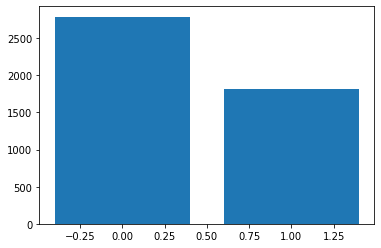

In [29]:
# bar charts are used to display value associated with categorical data
plt.bar(freq_table['spam'],freq_table['Count'])
plt.show()

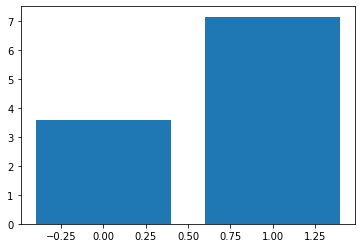

In [30]:
plt.bar(c['spam'],c['word_freq_business'])
plt.show()

**observations**

most of the business mails are not spammed

# Measures of central tendancy

In [31]:
cs=c['word_freq_education'].mean()
print(cs)
#median
cl=c['word_freq_email'].mode()
print(cl)
cm=c['word_freq_project'].median()
print(cm)

0.17986304347826104
0    0.0
dtype: float64
0.0


In [32]:
#standard deviation
std=c['word_freq_education'].std()
std

0.9112142549959448

In [36]:
#variance
var=c['word_freq_education'].var()
var

0.8303114185078146

In [37]:
c["word_freq_education"].skew()

10.121564835151247

In [38]:
#range
max_range = c["word_freq_education"].max()
min_range= c["word_freq_education"].min()

# Calculating the range
max_range- min_range

22.05

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


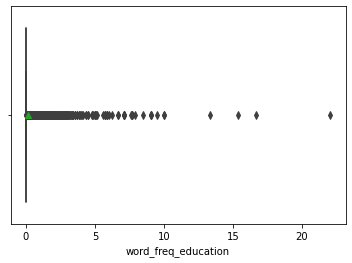

In [39]:
#boxplot of Respondent Age
import seaborn as sns
sns.boxplot(c["word_freq_education"], showmeans=True)

# Bivariate Analysis

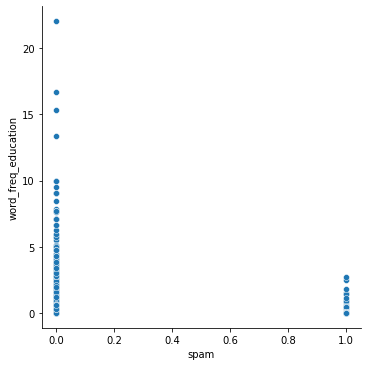

In [40]:
sns.relplot(x='spam',y='word_freq_education',data=c)

observation

most of emails with education word frequency are not spam

# Multivariate Analysis

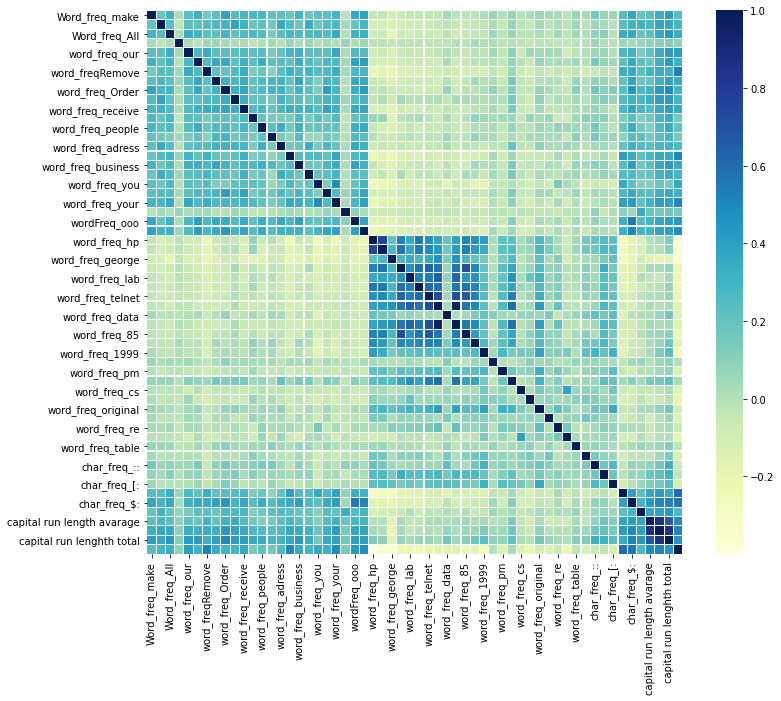

In [41]:
import seaborn as sns
corrmat = c.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [42]:
#dividin the data into x and y variables
x = c.drop(columns = ['spam'])
y =c['spam']
#
print(x)
print(y)

      Word_freq_make  ...  capital run lenghth total
0               0.21  ...                       1028
1               0.06  ...                       2259
2               0.00  ...                        191
3               0.00  ...                        191
4               0.00  ...                         54
...              ...  ...                        ...
4595            0.31  ...                         88
4596            0.00  ...                         14
4597            0.30  ...                        118
4598            0.96  ...                         78
4599            0.00  ...                         40

[4600 rows x 57 columns]
0       1
1       1
2       1
3       1
4       1
       ..
4595    0
4596    0
4597    0
4598    0
4599    0
Name: spam, Length: 4600, dtype: int64


In [12]:
#Then statndardize the data using StandardScaler, Fitting on the Training set and transforming both on the Training and Test Set.
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn import metrics

In [13]:
# Subject our features/indepedent to LDA model

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lDA= LDA()
#
lDA= lDA.fit(c, y)
ld_dfout = lDA.transform(c)

In [14]:
# Display the coeficients of the reducted columns
lDA.coef_

array([[-4.72722491e-01, -1.14737368e-01,  3.72655342e-01,
         1.13482357e-01,  8.01453326e-01,  1.13259636e+00,
         2.02791459e+00,  8.94890507e-01,  6.91004606e-01,
         1.43786735e-01,  5.42639494e-01, -2.65240990e-01,
         1.14847536e-01,  4.64734034e-02,  1.79115892e-01,
         7.14426471e-01,  4.92649456e-01,  5.22279123e-01,
         1.34555920e-01,  5.87605299e-01,  5.01445659e-01,
         4.26139088e-01,  1.66374263e+00,  8.65722343e-01,
        -2.20432162e-01, -2.05645118e-01, -1.16013843e-01,
         3.82297424e-02, -7.10112915e-02, -4.93735958e-01,
        -2.21073559e-01,  5.68104810e-02, -3.99199374e-01,
         4.86445976e-01, -2.96321055e-01,  2.53244772e-01,
        -3.15637941e-01, -5.08103054e-01, -1.87935814e-01,
         3.88257458e-01, -7.95896983e-02, -3.51068241e-01,
        -6.01631605e-01, -3.07936600e-01, -3.35066794e-01,
        -3.59576838e-01, -1.85472391e+00, -5.53519015e-01,
        -1.33275277e+00, -5.67907268e-01, -5.61010303e-0

In [16]:
#displaying coeffient in dataframe.
#
coeff = pd.DataFrame(index=c.columns.values, data=lDA.coef_[0].T)
coeff.sort_values(0, ascending=False)

,0
$:,2.220144
Remove,2.027915
ooo,1.663743
over,1.132596
internet,0.894891
money,0.865722
our,0.801453
free,0.714426
Order,0.691005
!:,0.646814


# 7. implementing the solution

# Naive Bayes Classifier

**Importing liblaries**

In [43]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

**Defining x and y variables**

In [44]:
x=c.drop(['spam'],axis=1).values
y=c['spam'].values

**Train test split**

I am performing a train test split on my dataset. I am providing the test size as 0.20, that means my training sample contains 320 training set and test sample contains 80 test set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

**Featurescaling**


Next, we are doing feature scaling to the training and test set of independent variables

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training the Naive Bayes model on the training set**

In [47]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**predicting the results**

In [48]:
y_pred  =  classifier.predict(X_test)

In [49]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [19]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

Most of the values , both are the same. I can evaluate my  matrix using the confusion matrix and accuracy score by comparing the predicted and actual test values

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
ac

0.8293478260869566

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[391 147]
 [ 10 372]]
              precision    recall  f1-score   support

           0       0.98      0.73      0.83       538
           1       0.72      0.97      0.83       382

    accuracy                           0.83       920
   macro avg       0.85      0.85      0.83       920
weighted avg       0.87      0.83      0.83       920



Accuracy is good.

# 8.Challenging the solution 

**repeating my model spliting my data to 70-30**

In [25]:
x=c.drop(['spam'],axis=1).values
y=c['spam'].values

In [26]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 

**Featurescaling**

Next, we are doing feature scaling to the training and test set of independent variables

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training the Naive Bayes model on the training set**

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**predicting the results**

In [29]:
y_pred  =  classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [30]:
y_test

array([1, 0, 0, ..., 1, 0, 1])

Most of the values , both are the same. I can evaluate my matrix using the confusion matrix and accuracy score by comparing the predicted and actual test values

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
ac

0.8173913043478261

The score of the model has ddecreased as compared to the previous model.

**confusion matrix**

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[585 237]
 [ 15 543]]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       822
           1       0.70      0.97      0.81       558

    accuracy                           0.82      1380
   macro avg       0.84      0.84      0.82      1380
weighted avg       0.86      0.82      0.82      1380



**repeating the process by spliting my dataset by 60-40**

In [33]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0) 

**Featurescaling**

Next, we are doing feature scaling to the training and test set of independent variables

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training the Naive Bayes model on the training set**

In [35]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**predicting results**

In [36]:
y_pred  =  classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [38]:
y_test

array([1, 0, 0, ..., 0, 0, 1])

this model is predicting values simillar to the tested values.I can evaluate my matrix using the confusion matrix and accuracy score by comparing the predicted and actual test values

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
ac

0.8043478260869565

the accuracy of this model dropped as compared to the previous models

**confusion matrix**

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[762 335]
 [ 25 718]]
              precision    recall  f1-score   support

           0       0.97      0.69      0.81      1097
           1       0.68      0.97      0.80       743

    accuracy                           0.80      1840
   macro avg       0.83      0.83      0.80      1840
weighted avg       0.85      0.80      0.81      1840



**conclusion**


more splitting of the data led to drop in accuracy

# Follow up questions


1. did i have the right data? yes
2. did i have the right question? yes